

One of the easiest ways to get a sense for the types of functions produced by different activation functions is to apply them to a simple univariate regression problem

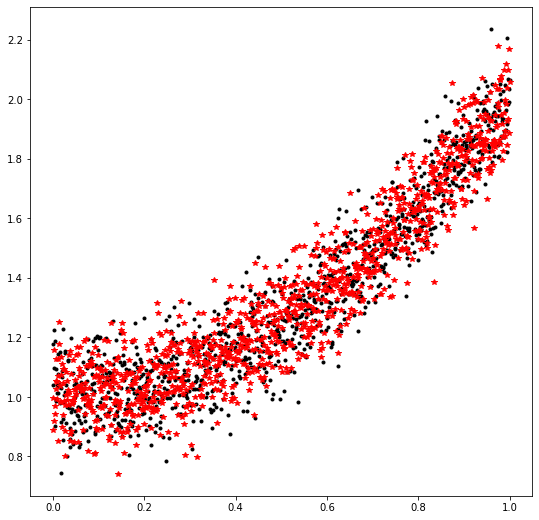

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['figure.figsize'] = (9,9)

np.random.seed(0)

# Create constantly-spaced x-values
x = np.linspace(0,1,1100)

# Create a linear function of $x$ with slope 1, intercept 1, and normally distributed error with sd=1
y = x**2 + np.random.randn(len(x))*0.1 + 1.0
y_test = x**2 + np.random.randn(len(x))*0.1 + 1.0
plt.plot(x,y,'k.')
plt.plot(x,y_test,'r*')
plt.show()

In [ ]:
x.reshape(-1,1)
y.reshape(-1,1)
y_test.reshape(-1,1)

array([[0.88953834],
       [0.9969072 ],
       [1.15788983],
       ...,
       [2.16982086],
       [1.88835205],
       [2.05726134]])

Using TensorFlow backend.


Epoch 1/10
1100/1100 [==============================] - 4s 4ms/step - loss: 0.3457 - mean_squared_error: 0.3457
Epoch 2/10
1100/1100 [==============================] - 2s 2ms/step - loss: 0.0189 - mean_squared_error: 0.0189
Epoch 3/10
1100/1100 [==============================] - 2s 2ms/step - loss: 0.0162 - mean_squared_error: 0.0162
Epoch 4/10
1100/1100 [==============================] - 2s 2ms/step - loss: 0.0158 - mean_squared_error: 0.0158
Epoch 5/10
1100/1100 [==============================] - 2s 2ms/step - loss: 0.0157 - mean_squared_error: 0.0157
Epoch 6/10
1100/1100 [==============================] - 2s 2ms/step - loss: 0.0156 - mean_squared_error: 0.0156
Epoch 7/10
1100/1100 [==============================] - 2s 2ms/step - loss: 0.0157 - mean_squared_error: 0.0157
Epoch 8/10
1100/1100 [==============================] - 2s 2ms/step - loss: 0.0157 - mean_squared_error: 0.0157
Epoch 9/10
1100/1100 [==============================] - 2s 2ms/step - loss: 0.0158 - mean_squared_error:

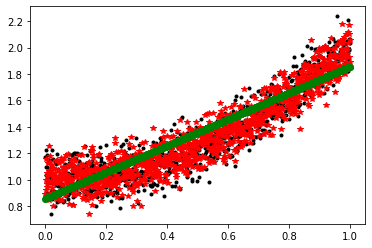

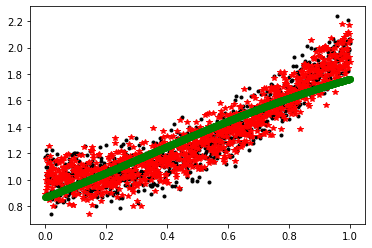

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

act_func=['relu','sigmoid']
for acti in act_func:

  NN_model = Sequential()

  # The Input Layer :
  NN_model.add(Dense(2, kernel_initializer='normal',input_dim = 1, activation=acti))

  # The Output Layer :
  NN_model.add(Dense(1, kernel_initializer='normal',activation='relu'))

  # Compile the network :
  NN_model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

  NN_model.fit(x, y_test,batch_size=1, epochs = 10)
  
  y_pred=NN_model.predict(x)
  NN_model.summary()
  
  accu=abs(y_pred-y_test)
  print("Error")
  print(accu)
  
  acti=plt.figure()
  plt.plot(x,y,'k.')
  plt.plot(x,y_test,'r*')
  plt.plot(x,y_pred,'go')



## 2 Bees

Dataset from the University of Puerto Rico, which contains images of bees entering their hive.  The task is to determine automatically which bees are carrying pollen.   



In [ ]:

!wget -N https://cainvas-static.s3.amazonaws.com/media/user_data/cainvas-admin/PollenDataset.zip
!unzip -qo PollenDataset.zip
!rm PollenDataset.zip

In [ ]:
import glob, os 
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import torchvision.transforms as transforms
%matplotlib inline 

path="images/"
imlist= glob.glob(os.path.join(path, '*.jpg'))

def dataset(file_list,size=(300,180),flattened=False):
    data = []
    for i, file in enumerate(file_list):
        image = io.imread(file)
        image = transform.resize(image, size, mode='constant')
        if flattened:
            image = image.flatten()

        data.append(image)

    labels = [1 if f.split("/")[-1][0] == 'P' else 0 for f in file_list]

    return np.array(data), np.array(labels)

# Load the dataset (may take a few seconds)
X,y=dataset(imlist)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)
y_train=y_train.reshape(-1,1)
y_test=y_test.reshape(-1,1)
# X has the following structure: X[imageid, y,x,channel]

# change channels last to channels first format
X_train = np.moveaxis(X_train, 3, 1)
X_test = np.moveaxis(X_test, 3, 1)

print('Class 0: ',sum(y==0))
print('Class 1: ',sum(y==1))
print('Total  : ',len(y))

ValueError: ignored

We can plot a couple of the images below.  If you check out a couple of these, you will see that the visible difference when bees carry pollen is the presence of large fluffy balls of pollen on their back legs.

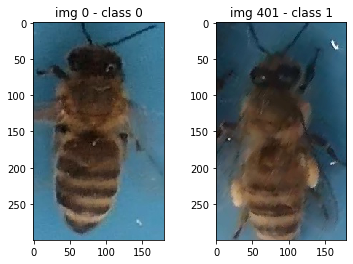

In [ ]:
fig, axes = plt.subplots(1,2)
k=0
plt.sca(axes[0])
plt.imshow(X[k])
plt.title('img {} - class {}'.format(k, y[k]))

k=401
plt.sca(axes[1])
plt.imshow(X[k])
plt.title('img {} - class {}'.format(k, y[k]));

## 2A A convolutional network architecture for bee classification (30 pts)

**Implement a 2D convolutional neural network for this problem using pytorch.  You are free to choose whatever network architecture you like.**

You can find a nice tutorial for implementing a network for a not dissimilar task [here](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html).

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        self.conv1 = nn.Conv2d(in_channels=3, out_channels=12, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()

        self.pool1 = nn.MaxPool2d(kernel_size=2)

        self.conv2 = nn.Conv2d(in_channels=12, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()

        self.pool2 = nn.MaxPool2d(kernel_size=2)

        self.conv3 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.relu3 = nn.ReLU()

        self.pool3 = nn.MaxPool2d(kernel_size=2)

        self.conv4 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.relu4 = nn.ReLU()

        self.pool4 = nn.MaxPool2d(kernel_size=2)

        self.fc1 = nn.Linear(in_features=18 * 11 * 64, out_features=400)

        self.fc2 = nn.Linear(in_features=400, out_features=2)

    def forward(self, input):
        output = self.conv1(input)
        output = self.relu1(output)

        output = self.pool1(output)

        output = self.conv2(output)
        output = self.relu2(output)

        output = self.pool2(output)

        output = self.conv3(output)
        output = self.relu3(output)

        output = self.pool3(output)

        output = self.conv4(output)
        output = self.relu4(output)

        output = self.pool4(output)

        output = output.view(-1, output.shape[2] * output.shape[3] * 64)

        output = self.fc1(output)

        output = self.fc2(output)

        return output


net = Net()
print(net)


Net(
  (conv1): Conv2d(3, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu1): ReLU()
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(12, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu2): ReLU()
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu3): ReLU()
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu4): ReLU()
  (pool4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=12672, out_features=400, bias=True)
  (fc2): Linear(in_features=400, out_features=2, bias=True)
)


## 2B Fitting the CNN to data (20 pts)
Select a batch size, number of epochs, a cost function, and and optimizer.  Fit your model to the training data, while also keeping track of the test set accuracy.

**Plot the training and test accuracy of your model at each epoch.  Comment on whether you think the model is being overfit.**

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [ ]:
import torch.utils.data as utils

tensor_x = torch.stack([torch.Tensor(i) for i in X_train]) # transform to torch tensors
tensor_y = torch.stack([torch.Tensor(i) for i in y_train])

my_dataset = utils.TensorDataset(tensor_x,tensor_y) # create your datset
# my_dataloader = utils.DataLoader(my_dataset)
trainloader = utils.DataLoader(my_dataset, batch_size=4,
                                          shuffle=True, num_workers=8)


In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net.to(device)


Net(
  (conv1): Conv2d(3, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu1): ReLU()
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(12, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu2): ReLU()
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu3): ReLU()
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu4): ReLU()
  (pool4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=12672, out_features=400, bias=True)
  (fc2): Linear(in_features=400, out_features=2, bias=True)
)

In [ ]:
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)

        # Reshape the labels
        labels = labels.view(labels.shape[0])

        loss = criterion(outputs, labels.long())
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 20 == 19:    # print every 20 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

AttributeError: ignored